In [ ]:
!pip install feedparser
!pip install WordCloud
import pandas as pd
import feedparser
from wordcloud import WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 6.1 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=ab20fb98113614ef3aa60d2d3e6e4b39502aa9e09b82ba7ac2b3f1c98bdcf21f
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#health documents
#health_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Health.xml')
#wellness_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Well.xml')

health = feedparser.parse('https://www.dailymail.co.uk/health/index.rss')
sport = feedparser.parse('https://www.dailymail.co.uk/sport/index.rss')
politics = feedparser.parse('https://www.buzzfeed.com/politics.xml')
politics_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Politics.xml')
#africa_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Africa.xml')
#middle_east_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/MiddleEast.xml')

#sports_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Sports.xml')
#golf_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Golf.xml')
#college_basketball_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/CollegeBasketball.xml')
#college_football_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/CollegeFootball.xml')
#soccer_feed = feedparser.parse('https://rss.nytimes.com/services/xml/rss/nyt/Soccer.xml')

In [ ]:
sport.entries[0]
#def create_feed_dict(feed, my_dict, category):


{'content': [{'base': 'https://www.dailymail.co.uk/sport/index.rss',
   'language': None,
   'type': 'text/plain',
   'value': ''}],
 'credit': 'Chelsea FC via Getty Images / Getty Images',
 'guidislink': False,
 'href': '',
 'id': 'https://www.dailymail.co.uk/sport/football/article-11082631/Marc-Cucurella-brink-signing-Chelsea-deal-worth-62MILLION-medical.html?ns_mchannel=rss&ns_campaign=1490&ito=1490',
 'link': 'https://www.dailymail.co.uk/sport/football/article-11082631/Marc-Cucurella-brink-signing-Chelsea-deal-worth-62MILLION-medical.html?ns_mchannel=rss&ns_campaign=1490&ito=1490',
 'links': [{'href': 'https://www.dailymail.co.uk/sport/football/article-11082631/Marc-Cucurella-brink-signing-Chelsea-deal-worth-62MILLION-medical.html?ns_mchannel=rss&ns_campaign=1490&ito=1490',
   'rel': 'alternate',
   'type': 'text/html'},
  {'href': 'https://i.dailymail.co.uk/1s/2022/08/05/00/61086325-0-image-a-56_1659654152549.jpg',
   'length': '11770',
   'rel': 'enclosure',
   'type': 'image/jpe

In [ ]:
my_dict = {
    'id': [],
    'content': [],
    'category': 'Health'
}

my_dict2 = {
    'id': [],
    'content': [],
    'category': 'Politics'
}

my_dict3 = {
    'id': [],
    'content': [],
    'category': 'Sports'
}


id_count = 0

for entry in health.entries:
  #print(entry['summary'])
  my_dict['id'].append(id_count + 1)
  my_dict['content'].append(entry['summary'])
  id_count += 1

for entry in sport.entries:
  #print(entry['summary'])
  my_dict2['id'].append(id_count + 1)
  my_dict2['content'].append(entry['summary'])
  id_count += 1

for entry in politics.entries:
  #print(entry['summary'])
  my_dict3['id'].append(id_count + 1)
  my_dict3['content'].append(entry['summary'])
  id_count += 1

for entry in politics_feed.entries:
  #print(entry['summary'])
  my_dict3['id'].append(id_count + 1)
  my_dict3['content'].append(entry['summary'])
  id_count += 1


health_df = pd.DataFrame(my_dict)
politics_df = pd.DataFrame(my_dict3)
sports_df = pd.DataFrame(my_dict2)


In [ ]:
full_df = health_df.append(politics_df).append(sports_df)

In [ ]:
full_df

,id,content,category
0,1,When Luke Pembroke was diagnosed with the blee...,Health
1,2,Researchers from Cambridge University said the...,Health
2,3,"Jessie Jane O'Brien, 31, from Rossendale, Lanc...",Health
3,4,Only two states - Montana and Wyoming - are ye...,Health
4,5,Imperial College London researchers reviewed s...,Health
...,...,...,...
145,296,Henderson gave a fiery interview to talkSPORT ...,Politics
146,297,Sydneysider Tina Rahimi has gone from boxing n...,Politics
147,298,The Seahawks are yet to make a decision on who...,Politics
148,299,"The trade deadline has come and gone, and with...",Politics


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
article_list = full_df['content']
X = vectorizer.fit_transform(article_list)

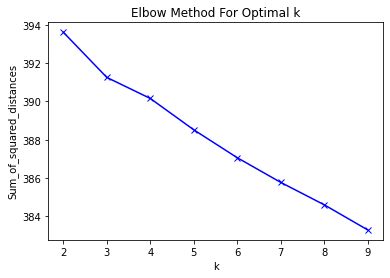

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
documents = full_df['content']
documents

0      A study led by the University of Exeter of mor...
1      The 45-year-old woman was having sex with her ...
2      The film changes colour based on levels of nit...
3      Beauty and cosmetic clinics across the UK have...
4      Analysis by FAIR Health - which has one of Ame...
                             ...                        
145    SIMON JONES: Midfielder Amadou Onana was a reg...
146    In the second qualifying heat of the men's 15k...
147    Chelsea have reportedly opened talks with Barc...
148    Ronaldo's future at United has been the subjec...
149    The Brisbane Broncos decided to pay out $1mill...
Name: content, Length: 422, dtype: object

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
filtered_docs = []
for doc in documents:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

print(filtered_docs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['a studi led univers exet 50,000 adult analys differ take blood pressur measur two arm compar one . ', 'the 45-year-old woman sex husband hattiesburg , mississippi , felt sudden , stab pain near heart . she suffer leak aorta orgasm . ', 'the film chang colour base level nitrat . an app analys colour give nitrit concentr valu , report expert universidad de burgo , spain . ', "beauti cosmet clinic across uk told stop promot riski hay fever inject risk target enforc action britain 's advertis drug watchdog . ", "analysi fair health - one america 's largest claim databas - show 357 percent surg claim link tick-born ill 2007 2021 rural area . ", 'when luke pembrok diagnos bleed disord haemophilia 11 month old , doctor offer mother debra glimmer hope - one day might cure . ', 'the studi nine over-65 prediabet barcelona , spain , measur switch quinoa-rich diet impact blood glucos level weight . ', "research cambridg univers said 'no evid causal link ' prostat cancer prostat size problem urin

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_docs)
#print(X.todense())

In [ ]:
from sklearn.cluster import KMeans
K = 3
model = KMeans(n_clusters=K, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("cluster no. of input documents, in the order they received:")
print(model.labels_)

from collections import Counter
cluster_label = model.fit_predict(X)
cluster_count = Counter(cluster_label)
cluster_count

cluster no. of input documents, in the order they received:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0]


Counter({0: 152, 1: 170, 2: 100})

In [ ]:
Y = vectorizer.transform(["The covid virus infects all people but is more fatal for old people"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["football is an amazing sport"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Messi and Ronaldo have been among the best players ever seen"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Trump and Biden are very different presidents"])
prediction = model.predict(Y)
print(prediction)


[0]
[1]
[0]
[1]


In [ ]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
doc1 = []
doc2 = []
doc3 = []
for i in range(K):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :50]: #print out 50 feature terms of each cluster
        #print (' %s' % terms[j])
        if i == 0:
          doc1.append(terms[j])
        elif i == 1:
          doc2.append(terms[j])
        elif i == 2:
          doc3.append(terms[j])
    print('------------')


Cluster centroids: 

Cluster 0:
------------
Cluster 1:
------------
Cluster 2:
------------


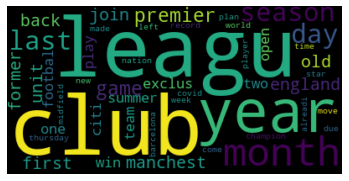

In [ ]:
#print(('Cluster 0: Politics')

import matplotlib.pyplot as plt
#text = order_centroids[0, :10]
#
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(doc1))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

['found', 'univers', 'research', 'peopl', 'studi', 'the', 'new', 'heart', 'risk', 'health', 'like', 'year', 'dr', 'said', 'diseas', 'cancer', 'hour', 'three', 'blood', 'develop', '000', 'but', 'uk', 'london', 'led', 'show', 'briton', 'patient', 'team', 'would', 'suffer', 'take', 'get', 'nh', 'state', 'could', 'warn', 'women', 'problem', 'adult', 'infect', 'one', 'caus', 'two', 'say', 'medic', 'make', 'use', 'case', 'per']


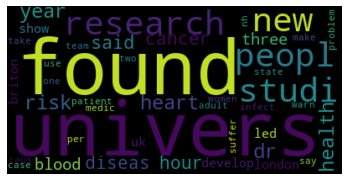

In [ ]:
print(doc2)
wordcloud = WordCloud().generate(' '.join(doc2))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

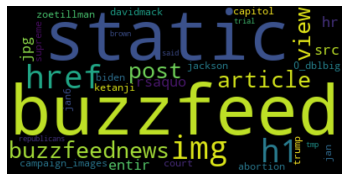

In [ ]:
wordcloud = WordCloud().generate(' '.join(doc3))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import silhouette_score

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
silhouette_avg = silhouette_score(X, cluster_label)
silhouette_avg

0.022619533173523595